In [1]:
# Standard libraries
import sys
import pickle

# Third party
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
# Load dataset
def load_data(file):
    d = {
        "x": [],
        "d": [],
        "sigma": []
    }
    # Skip first two rows, which are the header:
    with open(file) as f:
        for idx,line in enumerate(f):
            if idx < 3:
                pass
            else:
                val = line.split()
                d["x"].append(np.float(val[0]))
                d["d"].append(np.float(val[1]))
                d["sigma"].append(np.float(val[2]))
    # cast to numpy arrays
    d["x"] = np.array(d["x"])
    d["d"] = np.array(d["d"])
    d["sigma"] = np.array(d["sigma"])
    return d

def exact_data(x):
    '''Returns exact data using the given function'''
    return (1/2+np.tan(np.pi/2*x))**2
    
def add_noise(g, c):
    '''Add noise from a standard normal distribution to exact data'''
    random_vector = np.random.normal(loc=0, scale=1, size=len(g))
    sigma = np.abs(g*c*random_vector)
    
    return g*(1+c*random_vector), sigma

# Tests
x_f = np.array([0.1, 0.4])
x_ok = np.array([0.1, 0.2])
g_f = exact_data(x_f)
g_ok = np.round(exact_data(x_ok),4)
print(f'Return none if invalid x: {None == g_f}')
print(f'Return values if ok x: {[0.4335, 0.6805] == g_ok}')

Return none if invalid x: [False False]
Return values if ok x: [ True  True]


In [3]:
# Load given original data
file = 'D1_c_5.dat'
data = load_data(file)
x = data['x']
d = data['d']
sigma = data['sigma']
display(data)

{'x': array([0.03183, 0.06366, 0.09549, 0.12732, 0.15915, 0.19099, 0.22282,
        0.25465, 0.28648, 0.31831]),
 'd': array([0.31694, 0.33844, 0.42142, 0.57709, 0.56218, 0.68851, 0.73625,
        0.8727 , 1.0015 , 1.0684 ]),
 'sigma': array([0.01585 , 0.01692 , 0.02107 , 0.02885 , 0.02811 , 0.03443 ,
        0.03681 , 0.04364 , 0.050075, 0.05342 ])}

In [4]:
print(sigma_low_noise)

NameError: name 'sigma_low_noise' is not defined

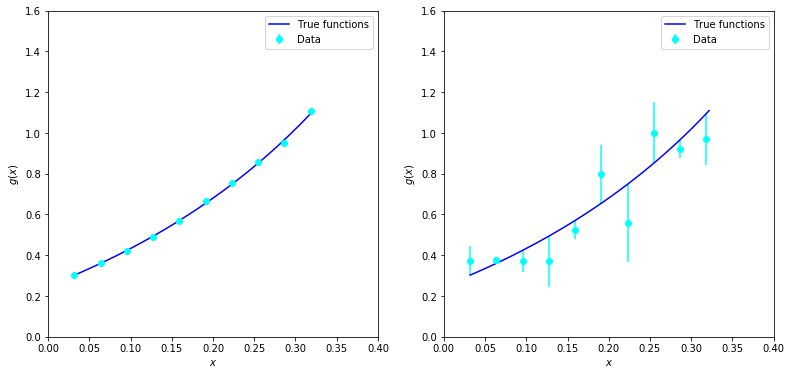

In [13]:
# Create new data with different noise levels
initial_noise_level = 0.05
noise_level_low = 0.05 / 5
noise_level_high = 0.05 * 5

true_x = np.arange(x.min(), x.max()+0.01, 0.01)
true_function = exact_data(true_x)

g = exact_data(x)
d_low_noise, sigma_low_noise = add_noise(g, noise_level_low)
d_high_noise, sigma_high_noise = add_noise(g, noise_level_high)

low_noise_data = {'x': x, 'd': d_low_noise, 'sigma': sigma_low_noise}
high_noise_data = {'x': x, 'd': d_high_noise, 'sigma': sigma_high_noise}

# Plot the new data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))

ax1.plot(true_x, true_function, color='blue', label='True functions')
ax1.errorbar(x, d_low_noise, yerr=sigma_low_noise, color='cyan', marker='o', linestyle='None', label='Data')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$g(x)$')
ax1.set_xlim(0, 0.4)
ax1.set_ylim(0, 1.6)
ax1.legend(loc='best')

ax2.plot(true_x, true_function, color='blue', label='True functions')
ax2.errorbar(x, d_high_noise, yerr=sigma_high_noise, color='cyan', marker='o', linestyle='None', label='Data')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$g(x)$')
ax2.set_xlim(0, 0.4)
ax2.set_ylim(0, 1.6)
ax2.legend(loc='best')

plt.show()

/home/simon/anaconda3/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


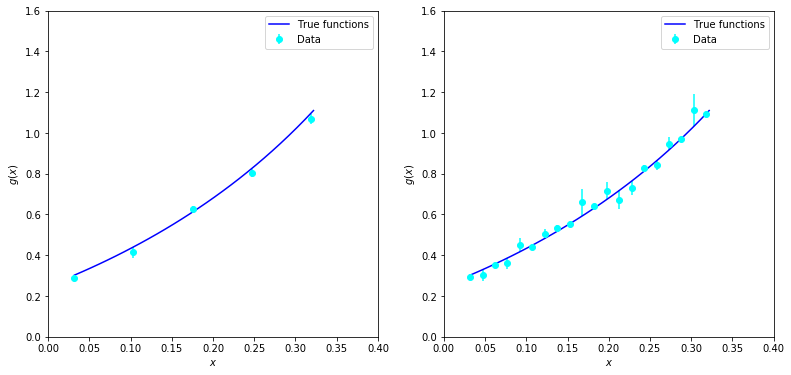

In [16]:
# Create new datasets with different quantities
initial_quantity = x.shape[0]
low_quantity = initial_quantity / 2
high_quantity = initial_quantity * 2

x_low_quantity = np.linspace(x.min(), x.max(), low_quantity)
x_high_quantity = np.linspace(x.min(), x.max(), high_quantity)

d_low_quantity, sigma_low_quantity = add_noise(exact_data(x_low_quantity), initial_noise_level)
d_high_quantity, sigma_high_quantity = add_noise(exact_data(x_high_quantity), initial_noise_level)

low_quantity_data = {'x': x_low_quantity, 'd': d_low_quantity, 'sigma': sigma_low_quantity}
high_quantity_data = {'x': x_high_quantity, 'd': d_high_quantity, 'sigma': sigma_high_quantity}

# Plot the new data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))

ax1.plot(true_x, true_function, color='blue', label='True functions')
ax1.errorbar(x_low_quantity, d_low_quantity, yerr=sigma_low_quantity, color='cyan', marker='o', linestyle='None', label='Data')
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$g(x)$')
ax1.set_xlim(0, 0.4)
ax1.set_ylim(0, 1.6)
ax1.legend(loc='best')

ax2.plot(true_x, true_function, color='blue', label='True functions')
ax2.errorbar(x_high_quantity, d_high_quantity, yerr=sigma_high_quantity, color='cyan', marker='o', linestyle='None', label='Data')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$g(x)$')
ax2.set_xlim(0, 0.4)
ax2.set_ylim(0, 1.6)
ax2.legend(loc='best')

plt.show()

In [17]:
# Save generated data
pickle.dump(low_noise_data, open('low_noise_data.pkl', 'wb'))
pickle.dump(high_noise_data, open('high_noise_data.pkl', 'wb'))
pickle.dump(low_quantity_data, open('low_quantity_data.pkl', 'wb'))
pickle.dump(high_quantity_data, open('high_quantity_data.pkl', 'wb'))